# Import Modules
You may need to install some of them.
But if you activate the environment inside this `examples` folder, all dependencies should be included.

In [1]:
using Pkg
Pkg.instantiate()

In [2]:
using Revise # for development useful
using DeconvOptim, TestImages, Colors, FFTW, Noise, ImageShow

# load test image
img = Float32.(testimage("resolution_test_512"))

# generate simple Point Spread Function of aperture radius 30
psf = Float32.(generate_psf(size(img), 30))

# create a blurred, noisy version of that image
img_b = conv(img, psf)
img_n = poisson(img_b, 300)

regularizer = GR()

┌ Warning: Replacing module `ImageCore`
└ @ Base loading.jl:1036


#160 (generic function with 1 method)

  0.319213 seconds (5.39 k allocations: 348.423 MiB, 2.71% gc time)


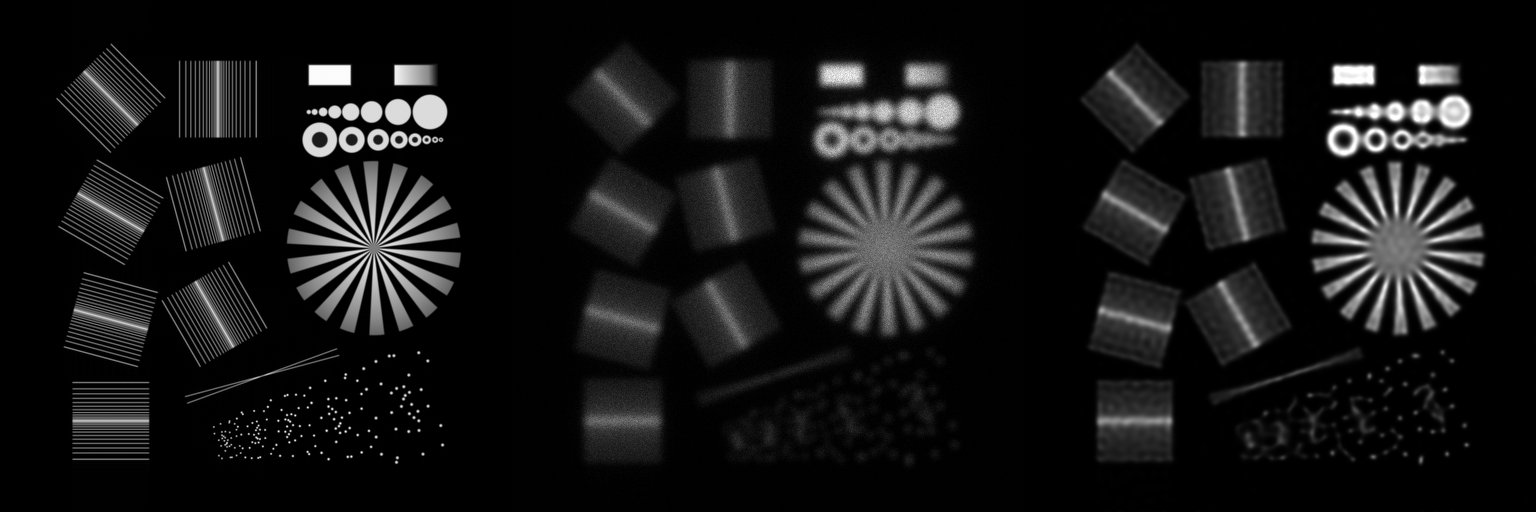

In [5]:
# deconvolve 2D with default options
@time res, o = deconvolution(img_n, psf, regularizer=regularizer)

# show final results next to original and blurred version
Gray.([img img_n res])